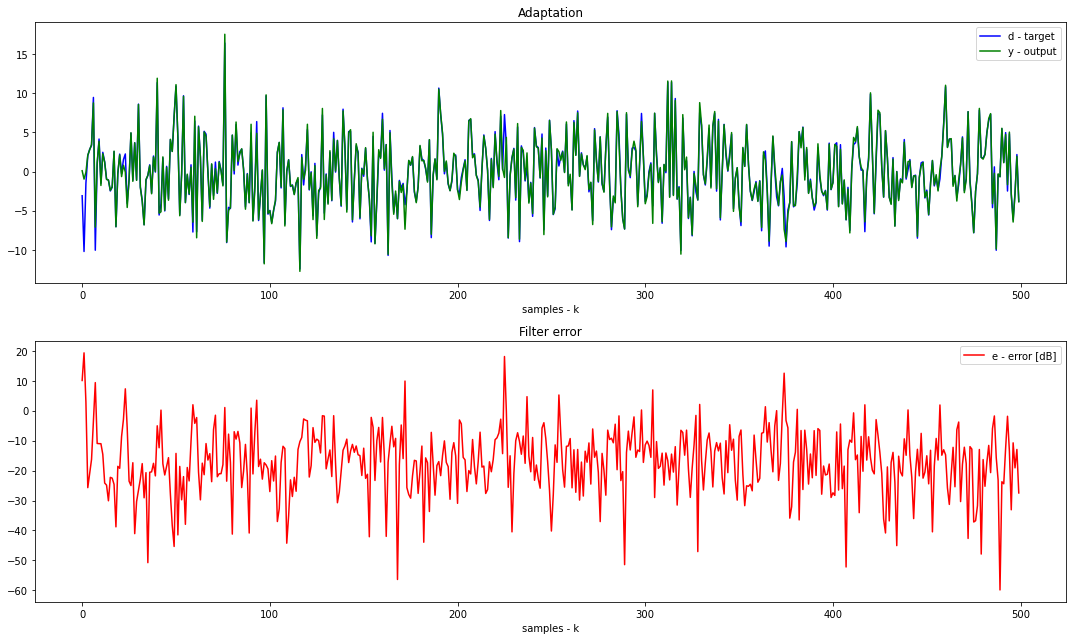

In [88]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa

# creation of data
N = 500
x = np.random.normal(0, 1, (N, 4)) # input matrix
v = np.random.normal(0, 0.1, N) # noise
d = 2*x[:,0] + 0.1*x[:,1] - 4*x[:,2] + 0.5*x[:,3] + v # target

# identification
f = pa.filters.FilterRLS(n=4, mu=0.1, w="random")
y, e, w = f.run(d, x)

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()

In [89]:
ww = np.linalg.lstsq(x, d, rcond=None)[0]
print (ww)
print (np.linalg.norm(x.dot(ww) - d))

print (w[-1])
print (np.linalg.norm(x.dot(w[-1]) - d))

print ((x.dot(w[-1]) - d)[-5:])
print (x.dot(w[-1])[-1])
print (y[-1])
print (e[-1])

[ 2.0032087   0.10339214 -4.00208128  0.50079593]
2.149716289292989
[ 1.91313232  0.2829472  -4.05955269  0.70017069]
6.837803797783244
[-0.12276523  0.01417272 -0.00431574 -0.00021006 -0.04228771]
-3.855822482365967
-3.855822482365967
0.042287710888548435


/Users/zexinliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


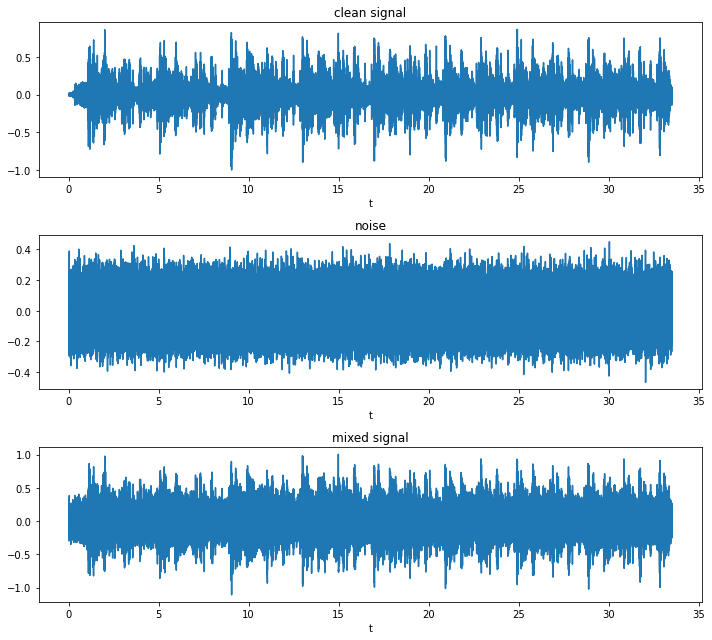

In [90]:
from scipy.io import wavfile
fs, signal = wavfile.read('data/file_example_WAV_1MG.wav')
x = signal[:, 0]

x = x - np.mean(x)
x = x / max(abs(x))
N = len(x)
t = np.arange(N) / fs

noise = np.random.normal(0, 0.1, N)
desired = x + noise

plt.figure(figsize=(10, 9))
plt.subplot(311)
plt.plot(t, x)
plt.xlabel('t')
plt.title('clean signal')
plt.subplot(312)
plt.plot(t, noise)
plt.xlabel('t')
plt.title('noise')
plt.subplot(313)
plt.plot(t, desired)
plt.xlabel('t')
plt.title('mixed signal')

plt.tight_layout()
plt.show()

In [106]:
def LMSfilter(x, d, M, mu):
    """
    Params:
    x: input signal, dim = Niter x 1
    d: desired signal response, dim = Niter x 1
    M: filter length
    mu: convergence step size
    ------
    Returns:
    W: weight matrix of filter, dim = M x 1
    e: estimation error, dim = Niter x 1
    """
    Niter = len(x)
    W = np.zeros([M, Niter])
    e = np.zeros(Niter, )

    for i in range(M, Niter+1):
        # xvec = x[i-1:i-1-M:-1] # x[M-1:-1:-1] = x[0], ..., x[M-1] -> x[Niter-1:Niter-1-M:-1] N:-1:N-M+1
        xvec = np.array([x[k] for k in range(i-1, i-1-M, -1)])
        e[i-1] = d[i-1] - W[:, i-2].dot(xvec)
        W[:, i-1] = W[:, i-2] + 2 * mu * e[i-1] * xvec

    y = np.zeros(Niter, )
    for i in range(M, Niter+1):
        xvec = np.array([x[k] for k in range(i-1, i-1-M, -1)])
        y[i-1] = W[:, -1].dot(xvec)
    
    return y, e, W

y, e, W = LMSfilter(x=x, d=desired, M=32, mu=0.02)


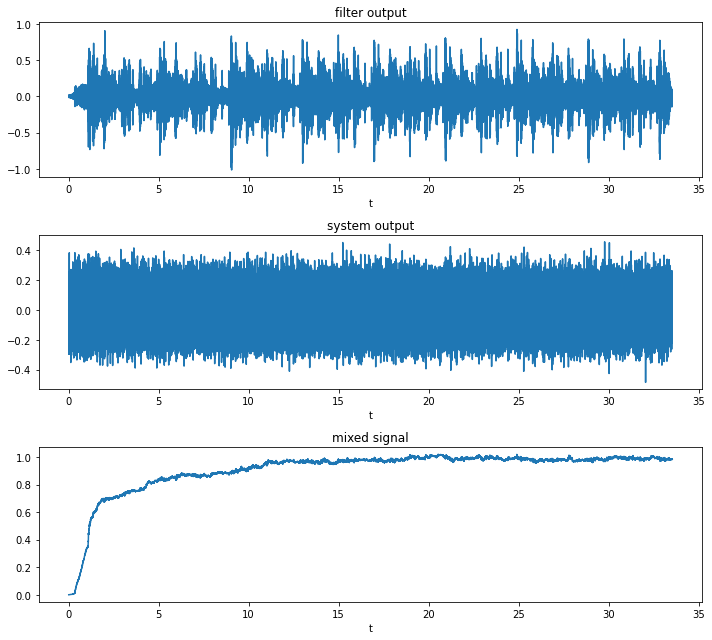

In [111]:
plt.figure(figsize=(10, 9))
plt.subplot(311)
plt.plot(t, y)
plt.xlabel('t')
plt.title('filter output')
plt.subplot(312)
plt.plot(t, e)
plt.xlabel('t')
plt.title('system output')
plt.subplot(313)
plt.plot(t, W[0,:])
plt.xlabel('t')
plt.title('mixed signal')

plt.tight_layout()
plt.show()

https://zhuanlan.zhihu.com/p/349131657

https://www.cnblogs.com/void0/p/4197337.html

https://www.cnblogs.com/xingshansi/p/6658203.html#